In [17]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
read_data=pd.read_csv(r'C:\Users\USER\Downloads\archive\train.csv')
read_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
read_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# how much missing data

read_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
read_data['Survived'].mean()

np.float64(0.3838383838383838)

In [ ]:
# survival rate by sex
read_data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [ ]:
#survival rate by class
read_data.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<Axes: xlabel='Sex', ylabel='Survived'>

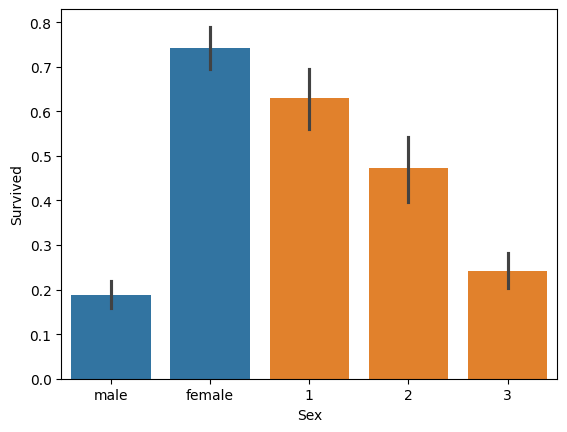

In [36]:
import seaborn as sns
sns.barplot(x='Sex', y='Survived', data=read_data)
sns.barplot(x='Pclass', y='Survived', data=read_data)

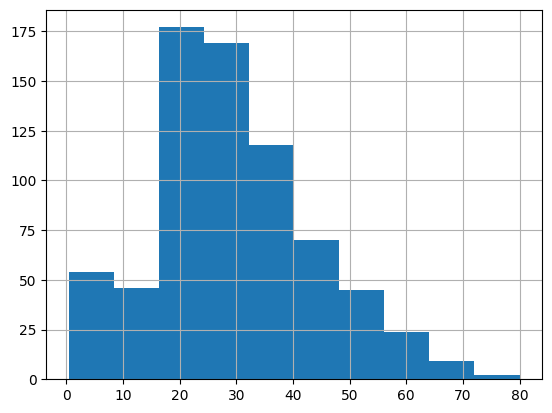

In [ ]:

# age with frequency variation
read_data['Age'].hist()
plt.show()


<Axes: xlabel='Fare'>

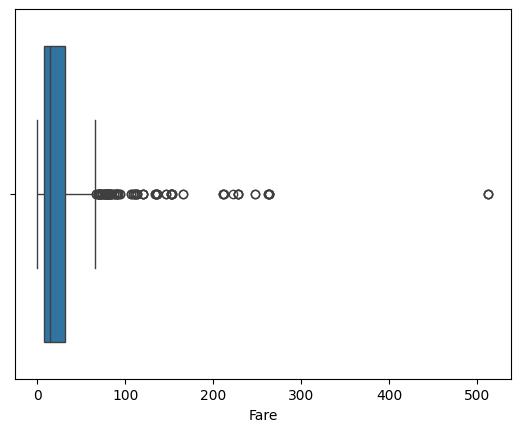

In [42]:
sns.boxplot(x=read_data['Fare'])


In [6]:
X=read_data.drop('Survived',axis=1)
y=read_data['Survived']

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)
X_test.shape,X_train.shape,y_test.shape,y_train.shape

((223, 11), (668, 11), (223,), (668,))

In [50]:
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

In [91]:
# fill missing values in age  use simple imputer

numeric_feature=['Age']
numeric_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median'))
])



In [92]:
#encode categorical features
sex_feature=['Sex']
sex_transformer=Pipeline(steps=[
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

embarked_feature=['Embarked']
embark_transformer=Pipeline(steps=[
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])



In [94]:
preprocessor=ColumnTransformer(
    transformers=[
    ('sex',sex_transformer,sex_feature),
    ('embark',embark_transformer,embarked_feature),
    ('age',numeric_transformer,numeric_feature)
    ])

# create a model pipeline with model and preprocessor


In [93]:
preprocessor

,transformers,"[('sex', ...), ('embark', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,steps,"['onehot', OneHotEncoder...nown='ignore')]"
,transform_input,None
,memory,None


In [ ]:
# extract title from name using regex

read_data["Title"] = read_data["Name"].str.extract(r",\s*([^\.]+)\.", expand=False)



# bin age into groups 

bins = [0, 12, 18, 35, 60, 120]  # age ranges
labels = ["Child", "Teenager", "Young Adult", "Adult", "Senior"]

# Create AgeGroup column
read_data["AgeGroup"] = pd.cut(read_data["Age"], bins=bins, labels=labels)

In [130]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.metrics import precision_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score,recall_score



In [152]:
models={
    'logistic':LogisticRegression(),
    'forest':RandomForestClassifier(),
    'xgboost':XGBClassifier()

}

results={}
pred_results={}

In [153]:
for model_name,model in models.items():

    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                      ("model", model)])
    

    model_pipeline.fit(X_train,y_train)
    y_preds=model_pipeline.predict(X_test)
    
    
    
    results[model_name]=model_pipeline.score(X_test,y_test)
    

results



{'logistic': 0.7668161434977578,
 'forest': 0.7130044843049327,
 'xgboost': 0.726457399103139}

In [151]:
# cross validation for model robustness
from sklearn.model_selection import cross_val_score,KFold


for model_name,model in models.items():

    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                      ("model", model)])
    

    cv_scores=cross_val_score(model_pipeline,X_train,y_train,cv=5,scoring='accuracy')




cv_scores





array([0.79104478, 0.7761194 , 0.82089552, 0.73684211, 0.7593985 ])

In [ ]:
# how the model is performing on average 
print(cv_scores.mean())
# how robust the model is 
print(cv_scores.std())

0.7768600605992593
0.028450727942094963


In [ ]:
for model_name, model in models.items():
    model_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),   
        ("model", model)
    ])

    model_pipeline.fit(X_train, y_train)
    y_preds = model_pipeline.predict(X_test)
    pred_results[model_name]={
        'accuracy': accuracy_score(y_test,y_preds),
        'precision':precision_score(y_test,y_preds),
        'recall':recall_score(y_test,y_preds),
        'confusion matrix':confusion_matrix(y_test,y_preds)
        
    }
    
pred_results


{'linear': {'accuracy': 0.7668161434977578,
  'precision': 0.6962025316455697,
  'recall': 0.6626506024096386,
  'confusion matrix': array([[116,  24],
         [ 28,  55]])},
 'forest': {'accuracy': 0.7174887892376681,
  'precision': 0.6388888888888888,
  'recall': 0.5542168674698795,
  'confusion matrix': array([[114,  26],
         [ 37,  46]])},
 'xgboost': {'accuracy': 0.726457399103139,
  'precision': 0.6527777777777778,
  'recall': 0.5662650602409639,
  'confusion matrix': array([[115,  25],
         [ 36,  47]])}}